# Figure 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import replay_structure.metadata as meta
import replay_structure.read_write as read_write
from replay_structure.utils import get_p_models, get_marginal_sum

#### Load data

In [2]:
ratday_data = dict()
run_snippet_data = dict()
model_comparison_results_ripples = dict()
model_comparison_results_run = dict()
for session in meta.Session_List:
    ratday_data[str(session)] = read_write.load_ratday_data(session)
    run_snippet_data[str(session)] = read_write.load_spikemat_data(
        session, meta.Run_Snippet_Data.default_time_window_ms, meta.Run_Snippet_Data.name, ext="")
    model_comparison_results_ripples[str(session)] = read_write.load_model_comparison_results(
        session, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function)
    model_comparison_results_run[str(session)] = read_write.load_model_comparison_results(
        session, meta.Run_Snippet_Data.default_time_window_ms, meta.Run_Snippet_Data.name, meta.Run_Snippet_Data.default_likelihood_function)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ratday/rat1day1_4cm.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/run_snippets/rat1day1_4cm_60ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/run_snippets/rat1day1_4cm_60ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ratday/rat1day2_4cm.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/run_snippets/rat1day2_4cm_60ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/run_snippets/rat1day2_4cm_60ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_struct

In [3]:
# load position marginals
session = meta.Session_List[0]
spikemat_list = np.arange(322)
run_marginals = dict()
for spikemat_ind in spikemat_list:
    run_marginals[spikemat_ind] = read_write.load_marginals(
        session, spikemat_ind, meta.Run_Snippet_Data.default_time_window_ms, meta.Run_Snippet_Data.name, meta.Run_Snippet_Data.default_likelihood_function, ext="")

In [4]:
p_models_ripples = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
p_models_run = np.zeros((meta.N_SESSIONS, meta.N_MODELS))

for i, session in enumerate(meta.Session_List):
    p_models_ripples[i] = model_comparison_results_ripples[str(session)].random_effects_results["p_models"]
    p_models_run[i] = model_comparison_results_run[str(session)].random_effects_results["p_models"]

    
p_models_mean_ripples = np.mean(p_models_ripples, axis=0)
p_models_sd_ripples = np.std(p_models_ripples, axis=0)
p_models_mean_run = np.mean(p_models_run, axis=0)
p_models_sd_run = np.std(p_models_run, axis=0)

# print p(M|X) mean and sd
for i, model in enumerate(meta.MODELS_AS_STR):
    print(f"{model} model: {np.round(p_models_mean_run[i]*100,1)}% +/- {np.round(p_models_sd_run[i]*100,1)}%")

# print p(M|X) grouped by trajectory/non-trajectory models
print("\n")
sum_trajectory = np.sum(p_models_run[:,:2], axis=1)*100
sum_nontrajectory = np.sum(p_models_run[:,2:], axis=1)*100
print(f"trajectory models: {np.round(np.mean(sum_trajectory), 1)}% +/- {np.round(np.std(sum_trajectory),1)}")
print(f"non-trajecotry models: {np.round(np.mean(sum_nontrajectory), 1)}% +/- {np.round(np.std(sum_nontrajectory),1)}")

diffusion model: 33.2% +/- 8.3%
momentum model: 55.5% +/- 9.6%
stationary model: 3.0% +/- 0.8%
stationary_gaussian model: 5.7% +/- 1.8%
random model: 2.7% +/- 0.7%


trajectory models: 88.6% +/- 2.6
non-trajecotry models: 11.4% +/- 2.6


In [5]:
model_names_dict = {'diffusion': 'Diffusion', 
               'momentum': 'Momentum', 
               'stationary': 'Stationary', 
               'stationary_gaussian': 'Gaussian', 
               'random': 'Random'}
model_names = [model_names_dict[model] for model in meta.MODELS_AS_STR]

data_type_colors = {'ripples': 'crimson', 'run_snippets': 'teal'}#'#1c75bc'} #steelblue

In [6]:
# font sizes
axis_label_fontsize = 7
model_names_fontsize = 6
letter_ticks_fontsize = 6
number_ticks_fontsize = 6
legend_fontsize=6
panel_label_fontsize = 8

/Users/emmakrause/Documents/PhD/Lab/replay_structure/replay_structure/utils.py:301: RuntimeWarning: invalid value encountered in true_divide
  marginal_norm = marginals / np.sum(marginals, axis=0)
/Users/emmakrause/Documents/PhD/Lab/replay_structure/replay_structure/utils.py:303: RuntimeWarning: divide by zero encountered in log
  marginal_plot = np.log(np.nansum(marginal_2d, axis=2))
/Users/emmakrause/Documents/PhD/Lab/replay_structure/replay_structure/utils.py:301: RuntimeWarning: invalid value encountered in true_divide
  marginal_norm = marginals / np.sum(marginals, axis=0)
/Users/emmakrause/Documents/PhD/Lab/replay_structure/replay_structure/utils.py:301: RuntimeWarning: invalid value encountered in true_divide
  marginal_norm = marginals / np.sum(marginals, axis=0)
/Users/emmakrause/Documents/PhD/Lab/replay_structure/replay_structure/utils.py:303: RuntimeWarning: divide by zero encountered in log
  marginal_plot = np.log(np.nansum(marginal_2d, axis=2))
/Users/emmakrause/Documents

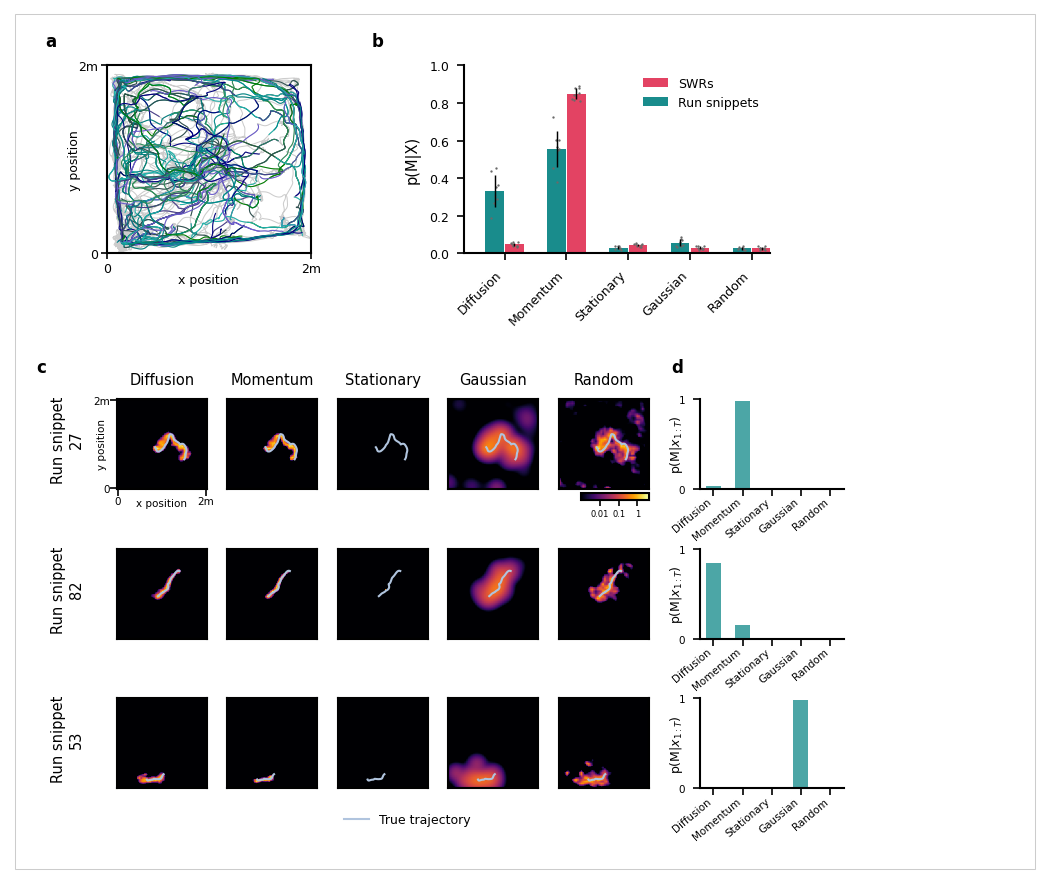

In [14]:
session = meta.Session_List[0]

marginals_plot = [27, 82, 53] #282  # 131, 45 
n_marginals_plot = len(marginals_plot)
env_linewidth = 1

plt.rcParams["axes.linewidth"] = 1

figure_width = 6.8
figure_height = 5.7

margin = 0.1

header_height = 0.35

# define plot dimensions (relative to a "1x1" plot for a marginal)
imshow_height = 1 / figure_height * 0.6
imshow_width = 1 / figure_width * 0.6
barplot_height = 1 / figure_height * 0.6
barplot_width = 1.6 / figure_width * 0.6

# define spacing
w_spacing = 0.02
h_spacing = 0.07

title_padding = 7
title_fontsize=7

model_names = ["Diffusion", "Momentum", "Stationary", "Gaussian", "Random"]
mc_xaxis_fontsize = 5


fig = plt.figure(
    figsize=(figure_width, figure_height), dpi=150, facecolor="w", edgecolor="k"
)

#add marginals
ax = dict()
for i in range(meta.N_MODELS):
    for j in range(n_marginals_plot):

        left = margin + (imshow_width * i) + w_spacing * i
        bottom = 1 - margin - header_height - imshow_height * (j + 1) - h_spacing * j

        ax[i, j] = fig.add_axes([left, bottom, imshow_width, imshow_height])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        for axis in ['top','bottom','left','right']:
            ax[i,j].spines[axis].set_linewidth(env_linewidth)


        if j == 0:
            ax[i, j].set_title(model_names[i], fontsize=title_fontsize, pad=title_padding)

        if (i == 0) & (j == 0):
            ax[i, j].set_xticks([0, 49])
            ax[i, j].set_yticks([0, 49])
            ax[i, j].set_xticklabels(["0", "2m"], fontsize=5)
            ax[i, j].set_yticklabels(["0", "2m"], fontsize=5)
            ax[i, j].set_xlabel("x position", fontsize=5, labelpad=-4)
            ax[i, j].set_ylabel("y position", fontsize=5, labelpad=-7)
            ax[i, j].tick_params(axis="both", pad=0.08)
            
        if (i == (meta.N_MODELS-1)) &( j == (0)):
            im = ax[i,j].imshow(get_marginal_sum(run_marginals[marginals_plot[j]].marginals[meta.MODELS_AS_STR[i]]),
                          aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
            
            axins1 = inset_axes(ax[i,j],
                    width="75%",  # width = 50% of parent_bbox width
                    height="8%",  # height : 5%
                    loc='lower right',
                    bbox_to_anchor=(0, -.13, 1, 1),
                    bbox_transform=ax[i,j].transAxes,
                    borderpad=0)

            cbar = fig.colorbar(im, cax=axins1, orientation="horizontal", ticks=np.log([.01, .1, 1]))
            cbar.ax.set_xticklabels(['0.01', '0.1', '1'])
            cbar.ax.tick_params(pad=1, length=3)
            
            
            axins1.set_frame_on(True)
            for axis in ['top','bottom','left','right']:
                axins1.spines[axis].set_linewidth(0.5)

            axins1.xaxis.set_ticks_position("bottom")
            axins1.tick_params(labelsize=4)
        
        else:
            ax[i,j].imshow(get_marginal_sum(run_marginals[marginals_plot[j]].marginals[meta.MODELS_AS_STR[i]]),
                          aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
        ax[i,j].plot(run_snippet_data[str(session)].run_info['true_trajectories_cm'][marginals_plot[j]][:,1]/4, 
                   run_snippet_data[str(session)].run_info['true_trajectories_cm'][marginals_plot[j]][:,0]/4,
                    color='lightsteelblue', linewidth=1, label='True trajectory')
        if (i==2) & (j == (n_marginals_plot-1)):
            ax[i,j].legend(frameon=False, fontsize=6, bbox_to_anchor=(1.6,-.15,0,0))
        

# add model probabilities
for j in range(n_marginals_plot):
    left = margin + (imshow_width * meta.N_MODELS) + w_spacing * meta.N_MODELS + .03
    bottom = 1 - margin - header_height - imshow_height * (j + 1) - h_spacing * j
    
    x_ticks = np.arange(meta.N_MODELS) + .5

    ax[meta.N_MODELS, j] = fig.add_axes([left, bottom, barplot_width, barplot_height])
    ax[meta.N_MODELS, j].set_xticks(x_ticks)
    ax[meta.N_MODELS, j].set_xticklabels(
        model_names, fontsize=mc_xaxis_fontsize, rotation=40, ha="right" 
    )
    ax[meta.N_MODELS, j].tick_params(axis="x", pad=0.08)
    ax[meta.N_MODELS, j].set_yticks([])
    ax[meta.N_MODELS, j].set_ylabel('p(M|$x_{1:T}$)', fontsize=6, labelpad=-3)
    ax[meta.N_MODELS, j].spines["right"].set_visible(False)
    ax[meta.N_MODELS, j].spines["top"].set_visible(False)
    ax[meta.N_MODELS, j].set_ylim([0,1])
    ax[meta.N_MODELS, j].set_yticks([0,1])
    ax[meta.N_MODELS, j].set_yticklabels([0,1], fontsize=5)
    
    
    run_p_models = get_p_models(model_comparison_results_run[str(session)].results_dataframe[meta.MODELS_AS_STR].iloc[marginals_plot[j]].values)
    ax[meta.N_MODELS, j].bar(x_ticks, run_p_models, width=.5, color='teal', alpha=.7)
    
    
    
w_spacing = 0.15

# define plot dimensions (relative to a "1x1" plot for a marginal)
panel1_width = .2
panel2_width = .3

panel_height = .22

panel1_left = 0.09
panel2_left = panel1_left + panel1_width + w_spacing

panel_bottom = .72

ax[3] = fig.add_axes([panel1_left, panel_bottom, panel1_width, panel_height])
ax[4] = fig.add_axes([panel2_left, panel_bottom, panel2_width, panel_height])


# behavior trajectories
i = 3

ax[i].set_xticks([0,200])
ax[i].set_yticks([0,200])
ax[i].set_xticklabels(['0', '2m'])
ax[i].set_yticklabels(['0', '2m'])
ax[i].set_xlim([0,200])
ax[i].set_ylim([0,200])
ax[i].set_xlabel("x position", fontsize=6, labelpad=-1)
ax[i].set_ylabel("y position", fontsize=6, labelpad=-1)
ax[i].tick_params(axis='both', labelsize=letter_ticks_fontsize, length=3, pad=1)

colors=['teal', 'slateblue', 'green', 'darkslateblue', 'seagreen', 'lightseagreen', 'darkcyan', 'darkslategray', 'navy'] #purple

ax[i].plot(ratday_data[str(session)].data['pos_xy_cm'][:,0], ratday_data[str(session)].data['pos_xy_cm'][:,1],
          color='gray', alpha=.4, linewidth=.5)
for j in range(len(run_snippet_data[str(session)].run_info['true_trajectories_cm'])):
    ax[i].plot(run_snippet_data[str(session)].run_info['true_trajectories_cm'][j][:,0], run_snippet_data[str(session)].run_info['true_trajectories_cm'][j][:,1],
            color=colors[j%len(colors)], linewidth=.5)
    

# model comparison summary
i = 4

x_axis = np.arange(meta.N_MODELS)+.5
bar_width=.3

ax[i].spines["right"].set_visible(False)
ax[i].spines["top"].set_visible(False)
ax[i].set_xticks(x_axis+bar_width/2+.01)
ax[i].set_xticklabels(model_names, ha='right') #rotation=45
ax[i].set_xlim([0,meta.N_MODELS-.05])
ax[i].set_ylabel("p(M|X)", fontsize=axis_label_fontsize)
ax[i].set_ylim([0,1])

ax[i].tick_params(axis='x', labelsize=model_names_fontsize, labelrotation=45)
ax[i].tick_params(axis='y', labelsize=number_ticks_fontsize)

ax[i].bar(x_axis+bar_width+.02, p_models_mean_ripples, yerr=p_models_sd_ripples,
        width=bar_width, color=data_type_colors['ripples'], alpha=.8, error_kw=dict(lw=.7, zorder=101), label='SWRs')
ax[i].bar(x_axis, p_models_mean_run, yerr=p_models_sd_run,
        width=bar_width, color=data_type_colors['run_snippets'], alpha=.9, error_kw=dict(lw=.7, zorder=101), label='Run snippets')
for s in range(meta.N_SESSIONS):
    ax[i].scatter(x_axis+bar_width+.02+(np.random.rand()-.5)/8, p_models_ripples[s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)
    ax[i].scatter(x_axis+(np.random.rand()-.5)/8, p_models_run[s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)
ax[i].legend(fontsize=legend_fontsize, frameon=False)


ax[3].text(-.3,1.1, "a", size=panel_label_fontsize, transform=ax[3].transAxes, fontweight='bold')
ax[4].text(-.3,1.1, "b", size=panel_label_fontsize, transform=ax[4].transAxes, fontweight='bold')
ax[0,0].text(-.9,1.3, "c", size=8, transform=ax[0,0].transAxes, fontweight='bold')
ax[5,0].text(-.2,1.3, "d", size=8, transform=ax[5,0].transAxes, fontweight='bold')

  

for i in range(n_marginals_plot):
    ax[0,i].text(-.55,.1, f"Run snippet\n{marginals_plot[i]}", size=7, transform=ax[0,i].transAxes, rotation=90, ha='center')


plt.savefig(os.path.join(meta.FIGURES_PATH, "Figure4.svg"), dpi=300, transparent=True)

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])
plt.show()

In [12]:
print(f"p_exceedance for: {meta.MODELS_AS_STR}")
p_exceedance_mat = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
for i, session in enumerate(meta.Session_List):
    print(session, ": ", np.round(model_comparison_results_run[str(session)].random_effects_results["p_exceedance"], 2))
    p_exceedance_mat[i] = model_comparison_results_run[str(session)].random_effects_results["p_exceedance"]
                 
print("\n")
for i, model in enumerate(meta.MODELS_AS_STR):
    print(f"{model} model: {np.round(p_exceedance_mat.mean(axis=0)[i],2)} +/- {np.round(p_exceedance_mat.std(axis=0)[i],2)}")

p_exceedance for: ['diffusion', 'momentum', 'stationary', 'stationary_gaussian', 'random']
rat1day1 :  [0. 1. 0. 0. 0.]
rat1day2 :  [0. 1. 0. 0. 0.]
rat2day1 :  [0.7 0.3 0.  0.  0. ]
rat2day2 :  [0.48 0.52 0.   0.   0.  ]
rat3day1 :  [0. 1. 0. 0. 0.]
rat3day2 :  [0. 1. 0. 0. 0.]
rat4day1 :  [0.02 0.98 0.   0.   0.  ]
rat4day2 :  [0.02 0.98 0.   0.   0.  ]


diffusion model: 0.15 +/- 0.26
momentum model: 0.85 +/- 0.26
stationary model: 0.0 +/- 0.0
stationary_gaussian model: 0.0 +/- 0.0
random model: 0.0 +/- 0.0
